# Introduction

The main objective of this exercise is to find out what has a higher correlation with the GDP in the US: stock market returns or immigration?

First, lets understand what is GPD, stock market returns and immigration

- The gross domestic product (GDP) is an indicator used to analyse the health of a country's economy. It is the total dollar value of all goods and services produced over a specific time period. Aka. size of the economy

- Stock Market Returns are the returns that the investors generate out of the stock market. This return could be in various forms like profit through trading or dividends given by the company to its shareholders.

- Immigration here, refers to the total migrants in USA in a given year.

Reference:
- www.economywatch.com/stock-markets-in-world/returns.html
- https://www.investopedia.com/ask/answers/199.asp


# How did I find the correlation

So to get this data, I tried to install the wbdata package to access the Worldbank data. Windows is truly bad when it comes to programming languages. I like to use Windows because I have been using it since I was a child and it comes to me much easier to me than Mac. The point here is that, package installation caused me trouble as I was trying to install it in the anaconda prompt which I use to run Jupyter. This caused errors and was truly frustrating. Hence I thought to start from scratch and followed http://jupyter.org/install to install jupyter directly using command prompt instead of using anaconda navigator. 
Once I installed this, I was successfully able to install the wbdata package.

Since, this was installed I referred to http://wbdata.readthedocs.io/en/latest/wbdata.html?highlight=merge to use this package to gather data and perform the analysis.

In [91]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [92]:
import wbdata
import pandas

In [93]:
wbdata.get_source()

11	Africa Development Indicators
36	Statistical Capacity Indicators
31	Country Policy and Institutional Assessment
41	Country Partnership Strategy for India (FY2013 - 17)
1 	Doing Business
30	Exporter Dynamics Database ��� Indicators at Country-Year Level
12	Education Statistics
13	Enterprise Surveys
28	Global Financial Inclusion
33	G20 Financial Inclusion Indicators
14	Gender Statistics
15	Global Economic Monitor
27	Global Economic Prospects
32	Global Financial Development
21	Global Economic Monitor Commodities
55	Commodity Prices- History and Projections
34	Global Partnership for Education
29	The Atlas of Social Protection: Indicators of Resilience and Equity
16	Health Nutrition and Population Statistics
39	Health Nutrition and Population Statistics by Wealth Quintile
40	Population estimates and projections
18	IDA Results Measurement System
45	Indonesia Database for Policy and Economic Research
6 	International Debt Statistics
54	Joint External Debt Hub
25	Jobs
37	LAC Equity Lab
19	M

The above code, is used to list down the databases the worldbank package has.

Here we can see the necessary databases like Population estimates and projections, Global Financial Development, and World Development Indicators to perform the analysis.

The below code (get_indicator) is to get deeper into the database and see the different kinds of data in the particular database. This data also  comes with their respective indicator (which you can see in the left column). These indicators can be used to extract data.

In [94]:
#wbdata.get_indicator(source=40)
wbdata.search_indicators("Net migration")

SM.POP.NETM	Net migration


In [95]:
#wbdata.get_indicator(source=32)
wbdata.search_indicators("Stock market return (%, year-on-year)")

GFDD.OM.02	Stock market return (%, year-on-year)


In [96]:
#wbdata.get_indicator(source=3)
#wbdata.search_indicators("GDP per capita growth (annual %)")

The search_indicator function is used to search for particular data's indicator. The reason we use this code, is so that we can use this search instead to easily search for what data we want rather than manually searching through the long list. 

In [97]:
wbdata.search_indicators("GDP per capita growth (annual %)")

NY.GDP.PCAP.KD.ZG	GDP per capita growth (annual %)


In [98]:
# wbdata.get_dataframe("NY.GDP.PCAP.KD.ZG", country='USA')
gdpdf = wbdata.get_dataframe({"NY.GDP.PCAP.KD.ZG":"GDP per capita growth (annual %)"}, country="USA", convert_date=True)

### Issue with the GDP data

There is not not much issue with the GDP data, except for the fact that the year 2017 and 1960 do not have values.

#### Similarly I found the data on Net Migration and Stock market Return (below).

In [99]:
nmigratndf = wbdata.get_dataframe({"SM.POP.NETM":"Net migration"}, country="USA", convert_date=True)
#nmigratndf

In [100]:
stockdf = wbdata.get_dataframe({"GFDD.OM.02":"Stock market return (%, year-on-year)"}, country="USA", convert_date=True)

In [101]:
#stockdf

### Issues with the Net Migration and Stock market retun data

The Net Migration data is only for every 5 years. Not all the values are present for all the years. For example there is no recent data. The last date for which data is present is the year 2012 and 2007 and so on. 
Also, we dont know if the immigration is cumulative for all the years or for that individual year.

The Stock price data ends in 2015 and starts from 1961 (rather than 1960).



#### To make it comparable we need net migration to be a % value. For this I needed the total population in US per year data.

From here on, I decided to gather information in terms of a dictionary, to have a (key, value) so it becomes easy to merge all the data together with the same key being the year.

To get the total population I referred to https://data.worldbank.org/indicator/SP.POP.TOTL?locations=US, which I found in google.
This also had indicator which I could use in the python code to extract data.

In [102]:
#wbdata.search_indicators("SP.POP.TOTL")
#totalpop = wbdata.get_dataframe({"SM.POP.TOTL":"Total Polulation"}, country="US").to_dict()['Total Polulation']
#t = totalpop.to_dict()['Total Polulation']

### Issue with the code for total population

Not all the values was present for all the years. Total population and immigration data, do not have values in the same year. This could cause a problem to calculate the percentage of net migration.

This was a problem, so after reading a lot I came across the link https://pypi.python.org/pypi/wbpy/2.0.1, which uses the concept of Indicator API's and instead of using get_dataframe, this uses get_dataset (in other words gives datasets rather than dataframe). Only for the total population we use the wbpy package because the dataset gives all the values. 

First I had to install the wbpy package using the pip given in the link. Then refering this link, I extracted the data for total population which resulted in values for every year. This data also matched with the total population data in link I pasted above (https://data.worldbank.org/indicator/SP.POP.TOTL?locations=US).

In [103]:
import wbpy
import pandas as pd
import numpy

api = wbpy.IndicatorAPI()
ds_total = api.get_dataset("SP.POP.TOTL", ["USA"],date="1960:2017").as_dict()["US"]
#ds_total

As mentioned above I wanted to convert the data into dictionaries such that I would be able to merge the data based on key. The reason I chose to do it this way, is becase I was not able to merge the data without using dictionaries.

In [104]:
#ds_mig = api.get_dataset("SM.POP.NETM", ["USA"],date="1960:2017").as_dict()["US"]
ds_mig = wbdata.get_dataframe({"SM.POP.NETM":"Net migration"}, country="US").to_dict()['Net migration']
#ds_mig

#ds_gdp = api.get_dataset("NY.GDP.PCAP.KD.ZG", ["USA"],date="1960:2017").as_dict()["US"]
ds_gdp = wbdata.get_dataframe({"NY.GDP.PCAP.KD.ZG":"GDP per capita growth (annual %)"}, country="US").to_dict()['GDP per capita growth (annual %)']
#ds_gdp

#ds_stock = api.get_dataset("GFDD.OM.02",["USA"],date="1960:2017").as_dict()["US"]
ds_stock = wbdata.get_dataframe({"GFDD.OM.02":"Stock market return (%, year-on-year)"}, country="US").to_dict()['Stock market return (%, year-on-year)']
#ds_stock

In [105]:
ds_mig_gdp = {}
ds_mig_gdp = {key:(ds_total[key], ds_mig[key], ds_gdp[key]) for key in ds_total}
#ds_mig_gdp

ds_stock_gdp = {}
ds_stock_gdp = {key:(ds_stock[key], ds_gdp[key]) for key in ds_stock}
#ds_stock_gdp

Here I made 2 lists in a dictionary format one containing values (total population, net migration, GDP) and other (stock, GDP) for 2 reasons.
- Firstly, I wanted to get the % value for net migration
- Secondly, the main objective is to find the correlation between GDP & Net migration and GDP & Stock returns and compare which correlation is higher.

In [106]:
import math
ds_mig_gdp1 ={}
for key, value in ds_mig_gdp.items():
    if  not math.isnan(ds_mig_gdp[key][1]):
        ds_mig_gdp1[key] = [(ds_mig_gdp[key][1]/ds_mig_gdp[key][0]) * 100, ds_mig_gdp[key][2]]
#ds_mig_gdp1

The above code successfully assigns another list with the % value of Net Migration and the GDP. 

Now we have 2 lists in dictionary format with key being the year, and values being (Net Migration, GDP) and (Stock, GDP).

This code also ignores the rows with NaN values. A simple if function that ignores any row with the NaN values. I referred the method .isnan() from the link: https://stackoverflow.com/questions/944700/how-can-i-check-for-nan-in-python

In [107]:
#s = pd.Series(ds_mp2)
s = pd.DataFrame.from_dict(ds_stock_gdp,'index')
s.columns = ['stock','gdp']


s1 = pd.DataFrame.from_dict(ds_mig_gdp1,'index')
s1.columns = ['mig_per','gdp']

Since the merging was done, I wanted to convert the dictionaries into meaningful dataframes. The above code does that for me. I referred to https://stackoverflow.com/questions/18837262/convert-python-dict-into-a-dataframe for the conversion from dictionary to dataframes. 
I also gave it meaninful column names (stock, gdp) and (mig_per, gdp). 
##### Another thing to note, since the time of the merge until now, I have made sure that the key remains the same which is the year (for which the values is available). Both the dataframes now match in terms of value present per year. 

# Observation

Since the data extract, clean & merge task was accomplished. It was time for some obervation

,stock,gdp
stock,1.00000,0.32046
gdp,0.32046,1.00000


,mig_per,gdp
mig_per,1.000000,0.085958
gdp,0.085958,1.000000


0.32046045963006187

0.08595837184348529

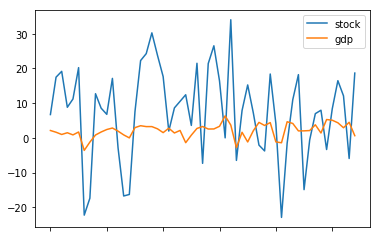

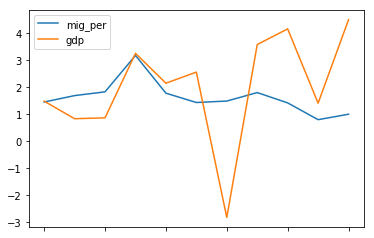

In [108]:
s.plot.line()
s1.plot.line()

s.corr()
s1.corr()

s['gdp'].corr(s['stock'])
s1['gdp'].corr(s1['mig_per'])



I referred to https://stackoverflow.com/questions/19428029/how-to-get-correlation-of-two-vectors-in-python to do the correlation between 2 columns in a dataframe.

#### Now, what do we observe here?
- Taking the graph 1 into consideration, we see that GDP across the years goes up and down but from what we can see, we cannot exactly say that stock raise or decline is affecting the GDP or vice versa.

- Similarly in graph 2, is the migration data really affecting the GDP or vice versa?

- So then I took the correlation data, we can see that with GDP, stock is correlated by 0.320 units

- And GDP, with migrants % is correlated by 0.085 units

#### Is the graph really effective?
According to me considering the graph here is pointless. Because very less can be seen by our naked human eyes and our findings from this will be more error prone. 


# Conclusion

Looking at the observation I could say that neither the Stock market returns nor Net Immigration is correlated with the GDP (because 0.32 is a very low value and is not close to 1). But considering their correlation the Stock market returns has a higher correlation with GDP than the Net Immigration.